In [1]:
import autograd.numpy as np #必须用这个numpy，直接导入numpy迭代会报错
import sympy as sp
from autograd import grad, jacobian
import matplotlib.pyplot as plt
import openpyxl as xl

In [2]:
wb = xl.load_workbook('D:\data_fitting\gaussian\gaussian.xlsx')
sheet = wb['Sheet1']
x = []
y = []
for row in range(1, sheet.max_row+1):
    cell = sheet.cell(row=row,column=1)
    x.append(cell.value)
for row in range(1, sheet.max_row+1):
    cell = sheet.cell(row=row,column=2)
    y.append(cell.value)

x_data = np.array(x).flatten()
y_data = np.array(y).flatten()
n = len(x_data)

In [3]:
def gaussian(x,a):
    g = a[0]/(a[1]*np.sqrt(np.pi/(4*np.log(2))))*np.exp(-4*np.log(2)*(x-a[2])**2/a[1]**2)+a[3]
    return g

def chi_square(a):

    chi_square = 0
    for i in range(n):
        chi_square += (y_data[i] - (a[0]/(a[1]*np.sqrt(np.pi/(4*np.log(2))))*np.exp(-4*np.log(2)*(x_data[i]-a[2])**2/a[1]**2)+a[3]))**2
    return chi_square

In [4]:
x, a1, a2, a3, a4 = sp.symbols('x a1 a2 a3 a4')
f = a1/(a2*sp.sqrt(sp.pi/(4*sp.ln(2))))*sp.exp(-4*sp.ln(2)*(x-a3)**2/a2**2)+a4
f

2*a1*exp(-4*(-a3 + x)**2*log(2)/a2**2)*sqrt(log(2))/(sqrt(pi)*a2) + a4

In [5]:
sp.diff(f,a1)

2*exp(-4*(-a3 + x)**2*log(2)/a2**2)*sqrt(log(2))/(sqrt(pi)*a2)

In [6]:
sp.diff(f,a2)

-2*a1*exp(-4*(-a3 + x)**2*log(2)/a2**2)*sqrt(log(2))/(sqrt(pi)*a2**2) + 16*a1*(-a3 + x)**2*exp(-4*(-a3 + x)**2*log(2)/a2**2)*log(2)**(3/2)/(sqrt(pi)*a2**4)

In [7]:
sp.diff(f,a3)

-8*a1*(2*a3 - 2*x)*exp(-4*(-a3 + x)**2*log(2)/a2**2)*log(2)**(3/2)/(sqrt(pi)*a2**3)

In [8]:
'''Derive the function for Newton-Raphson'''
def func1(a):
    diff = 0
    for i in range(n):
        diff += (y_data[i] - (a[0]/(a[1]*np.sqrt(np.pi/(4*np.log(2))))*np.exp(-4*np.log(2)*(x_data[i]-a[2])**2/a[1]**2)+a[3]))*(1/(a[1]*np.sqrt(np.pi/(4*np.log(2))))*np.exp(-4*np.log(2)*(x_data[i]-a[2])**2/a[1]**2)+a[3])
    return diff

def func2(a):
    diff = 0
    for i in range(n):
        diff += (y_data[i] - (a[0]/(a[1]*np.sqrt(np.pi/(4*np.log(2))))*np.exp(-4*np.log(2)*(x_data[i]-a[2])**2/a[1]**2)+a[3]))*(-2*a[0]*np.exp(-4*(x_data[i]-a[2])**2*np.log(2)/a[1]**2)*np.sqrt(np.log(2))/(np.sqrt(np.pi)*a[1]**2)+16*a[0]*(x_data[i]-a[2])**2*np.exp(-4*(x_data[i]-a[2])**2*np.log(2)/a[1]**2)*np.log(2)**(3/2)/(np.sqrt(np.pi)*a[1]**4))
    return diff

def func3(a):
    diff = 0
    for i in range(n):
         diff += (y_data[i] - (a[0]/(a[1]*np.sqrt(np.pi/(4*np.log(2))))*np.exp(-4*np.log(2)*(x_data[i]-a[2])**2/a[1]**2)+a[3]))*(-8*a[0]*(2*a[2]-2*x_data[i])*np.exp(-4*(x_data[i]-a[2])**2*np.log(2)/a[1]**2)*np.log(2)**(3/2)/(np.sqrt(np.pi)*a[1]**3))
    return diff

def func4(a):
    diff = 0
    for i in range(n):
        diff += (y_data[i] - (a[0]/(a[1]*np.sqrt(np.pi/(4*np.log(2))))*np.exp(-4*np.log(2)*(x_data[i]-a[2])**2/a[1]**2)+a[3]))
    return diff

In [9]:
jac_func1 = jacobian(func1)
jac_func2 = jacobian(func2)
jac_func3 = jacobian(func3)
jac_func4 = jacobian(func4)


In [10]:
i = 0
error = 100
tol = 1e-12
maxiter = 1000
M = 4
N = 4

x_0 = np.array([2.,1.,30., 1.56], dtype=float).reshape(N,1)
fun_evaluate = np.array([func1(x_0),func2(x_0),func3(x_0),func4(x_0)]).reshape(M,1)

er = []
iter = []
while np.any(error > tol) and i < maxiter:
    func_evaluate = np.array([func1(x_0),func2(x_0),func3(x_0),func4(x_0)]).reshape(M,1)
    flat_x_0 = x_0.flatten()
    jac = np.array([jac_func1(flat_x_0),jac_func2(flat_x_0),jac_func3(flat_x_0),jac_func4(flat_x_0)])
    jac.reshape(M,N)

    x_new = x_0 - np.linalg.inv(jac)@func_evaluate
    error = (abs(x_new - x_0)/x_0)
    
    x_0 = x_new

    print(i)
    print(error)
    print('-'*10)

    er.append(error)
    iter.append(i)
    
    i += 1
    
print('The Solution is: {}'.format(x_new))
print("LHS of function 1: {}".format(np.around(func1(x_new),6)))
print("LHS of function 2: {}".format(np.around(func2(x_new),6)))
print("LHS of function 3: {}".format(np.around(func3(x_new),6)))
print("LHS of function 4: {}".format(np.around(func4(x_new),6)))
print("The estimation error is: {}".format(np.sqrt(chi_square(x_new)/(n-4))))


0
[[0.65999033]
 [0.19144531]
 [0.00234471]
 [0.08185345]]
----------
1
[[0.94580921]
 [1.02867395]
 [0.00905306]
 [0.08026768]]
----------
2
[[0.08939408]
 [0.06265596]
 [0.00153792]
 [0.01748824]]
----------
3
[[0.02987745]
 [0.05033199]
 [0.00020208]
 [0.00499481]]
----------
4
[[3.93058654e-03]
 [5.57840568e-03]
 [6.24241885e-06]
 [6.75086651e-04]]
----------
5
[[5.45485899e-05]
 [6.72540848e-05]
 [2.53688604e-08]
 [9.35439707e-06]]
----------
6
[[8.83391536e-09]
 [9.65995975e-09]
 [1.84245309e-12]
 [1.51582242e-09]]
----------
7
[[1.78227743e-16]
 [2.41203800e-16]
 [0.00000000e+00]
 [1.66603753e-16]]
----------
The Solution is: [[ 1.2458476 ]
 [ 1.84113687]
 [29.71050536]
 [ 1.33277073]]
LHS of function 1: [0.]
LHS of function 2: [-0.]
LHS of function 3: [0.]
LHS of function 4: [0.]
The estimation error is: [0.0290496]


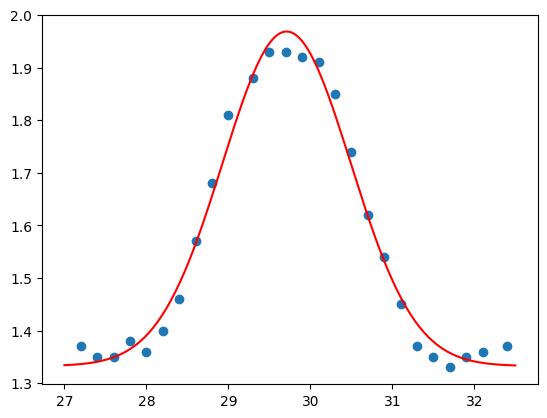

In [11]:
plt.scatter(x_data,y_data)
x = np.linspace(27,32.5,200)
y = gaussian(x,x_new)
plt.plot(x,y,'r')
plt.show()